In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from kmodes.kmodes import KModes

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

In [26]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_normalized)
print("K-Means Cluster Labels:", kmeans_labels)
print("K-Means Silhouette Score:", silhouette_score(X_normalized, kmeans_labels))

K-Means Cluster Labels: [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
K-Means Silhouette Score: 0.4798814508199817


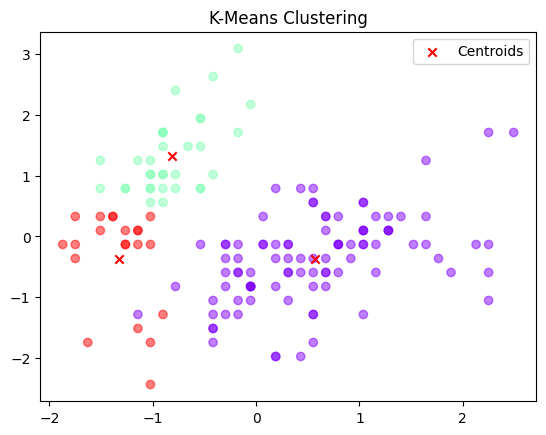

In [28]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=kmeans_labels, cmap='rainbow', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [29]:
kmedoids = KMedoids(n_clusters=3, random_state=42, metric="euclidean")
kmedoids_labels = kmedoids.fit_predict(X_normalized)
print("K-Median Cluster Labels:", kmedoids_labels)
print("K-Median Silhouette Score:", silhouette_score(X_normalized, kmedoids_labels))

K-Median Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
K-Median Silhouette Score: 0.4590416105554613


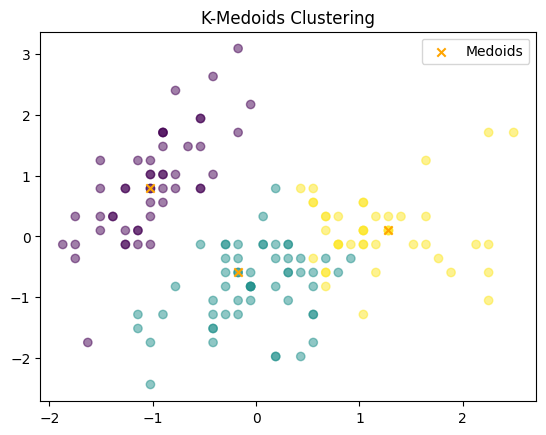

In [30]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=kmedoids_labels, alpha=0.5)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], c='orange', marker='x', label='Medoids')
plt.title("K-Medoids Clustering")
plt.legend()
plt.show()

In [31]:
mushroom_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)
mushroom_data = mushroom_data.sample(1000, random_state=42)  # Take a subset for faster processing

In [32]:
kmodes = KModes(n_clusters=3, init="Cao", n_init=5, verbose=1)
kmodes_labels = kmodes.fit_predict(mushroom_data)
print("K-Modes Cluster Labels:", kmodes_labels)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 177, cost: 7017.0
Run 1, iteration: 2/100, moves: 29, cost: 7017.0
K-Modes Cluster Labels: [2 1 1 0 1 1 0 1 0 0 0 0 0 2 0 0 0 1 2 0 0 0 1 0 0 2 0 0 0 2 1 1 0 0 0 1 0
 1 1 1 1 2 1 0 1 2 2 0 1 0 1 1 1 1 0 1 0 2 2 1 1 0 0 0 1 1 2 1 0 1 2 1 2 1
 1 1 0 1 1 1 2 1 2 0 0 0 2 0 0 1 0 2 0 0 1 1 1 0 1 2 0 0 0 2 1 1 0 1 0 1 1
 0 0 1 0 0 0 0 2 2 1 1 1 0 0 2 1 1 2 0 2 2 2 2 0 1 0 1 1 1 0 0 2 1 1 0 2 2
 0 1 1 2 0 1 0 0 2 1 1 1 0 2 1 0 1 2 1 1 1 2 2 0 0 0 1 0 1 0 2 2 0 1 0 0 1
 0 0 1 1 2 0 1 0 0 0 0 1 0 2 0 0 1 0 0 2 0 2 1 0 1 1 0 0 2 1 2 1 1 1 2 0 1
 0 0 0 0 2 0 1 1 1 2 0 2 0 1 0 2 1 0 0 1 1 0 2 0 1 0 0 1 0 2 0 1 0 1 0 1 0
 0 0 0 0 0 1 0 2 0 0 0 0 0 2 0 0 1 2 0 0 0 0 1 2 1 0 2 1 0 1 1 1 0 2 2 2 0
 2 2 1 0 2 1 1 1 0 1 1 0 0 1 1 2 0 2 2 1 2 1 0 1 0 2 0 1 1 1 2 0 1 1 2 0 1
 1 2 1 1 1 0 1 2 2 0 1 0 0 2 0 0 1 2 2 2 0 0 0

In [33]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
def rbf_kernel(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

In [35]:
c = np.mean(X_train, axis=0)
sigma = 1.0
rbf_features = np.array([rbf_kernel(x, c, sigma) for x in X_train])
print("RBF Features Shape:", rbf_features.shape)

RBF Features Shape: (105,)


In [36]:
svm_rbf = SVC(kernel="rbf", gamma=1.0, C=1.0)
svm_rbf.fit(X_train, y_train)


SVC(gamma=1.0)

In [37]:
y_pred = svm_rbf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

